In [2]:
import pandas as pd

df = pd.read_csv('../data/processed/credit_data_with_risk.csv')
df['Risk'] = df['Risk'].map({'Good': 0, 'Bad': 1})  # Required for IV calc
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,1


In [3]:
cat_cols = ['Saving accounts', 'Checking account', 'Purpose', 'Housing']

# Fill NaNs with 'Unknown'
df[cat_cols] = df[cat_cols].fillna('Unknown')

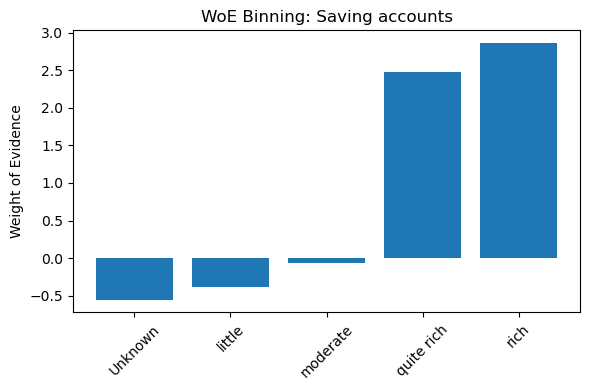

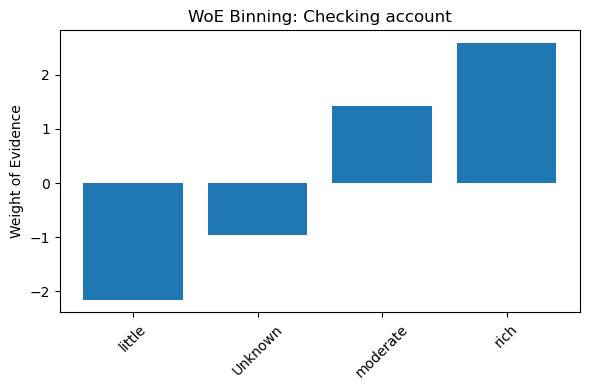

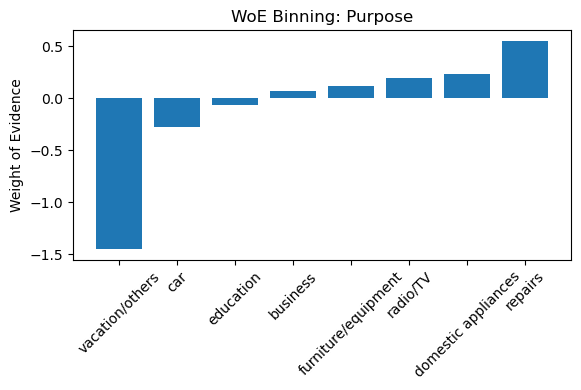

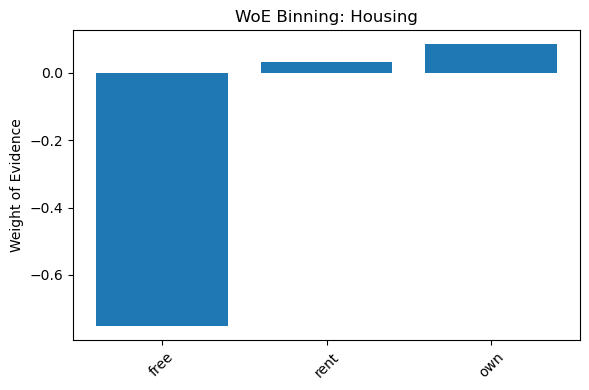

In [5]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from data_prep import calc_woe_iv
import matplotlib.pyplot as plt

iv_scores = {}

for col in cat_cols:
    woe_table, iv = calc_woe_iv(df, col, 'Risk')
    iv_scores[col] = iv

    # Plot WoE for that column
    plt.figure(figsize=(6, 4))
    plt.bar(woe_table['Value'], woe_table['WoE'])
    plt.title(f'WoE Binning: {col}')
    plt.ylabel('Weight of Evidence')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


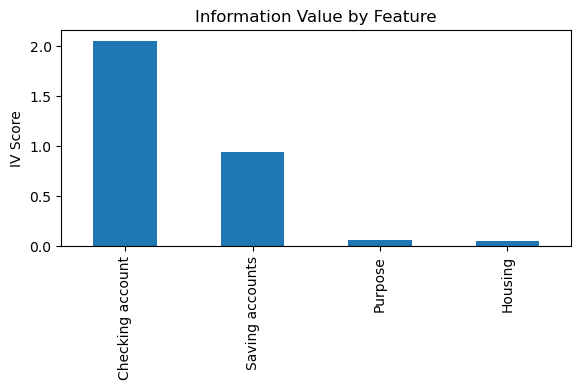

In [6]:
# Bar plot for IV
iv_df = pd.Series(iv_scores).sort_values(ascending=False)

iv_df.plot(kind='bar', figsize=(6, 4), title='Information Value by Feature')
plt.ylabel('IV Score')
plt.tight_layout()
plt.show()
